In [ ]:
!pip install -q -U torch torchvision -f https://download.pytorch.org/whl/torch_stable.html 
!pip install -q -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip install -q detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cpu/index.html

In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html
!pip install fastai

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html
     |████████████████████████████████| 6.0 MB 703 kB/s 
     |████████████████████████████████| 47 kB 393 kB/s 
     |████████████████████████████████| 74 kB 699 kB/s 
     |████████████████████████████████| 112 kB 3.6 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-py3-none-any.whl size=58542 sha256=0a874db3b9503873af533c125963f8fa12bc6850056a7ad9a481960e94625548
  Stored in directory: /root/.cache/pip/wheels/a6/02/09/10e3a0150eb92e5ecbee3677a813bffc32a8ec6f876bfe4adf
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=7ef765c78159ef0df2875ef26354fbad58deb016faad9e86f5aa1e1cab36aae0
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp37-cp37m-linux_x86_64.whl size=272639 sha256=e5d43646de6e70c6

Underneed you'll find the extra libraries we'll use in this notebook. More libraries will be added througout the notebook when needed.

In [ ]:
# Base setup:
# detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
%matplotlib inline

# detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

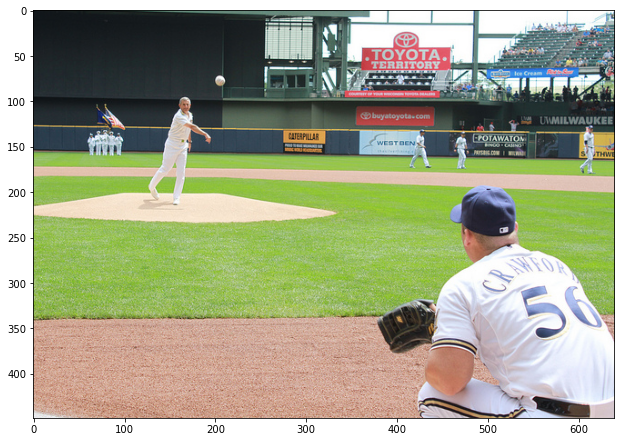

In [ ]:
# path = Path('/kaggle/input/dsta-brainhack-2021/c1_release/c1_release');path.ls()
# imgs, lbl_bbox = get_annotations(path/'train.json')


!wget http://images.cocodataset.org/val2017/000000282037.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")

plt.figure(figsize=(15,7.5))
plt.imshow(im[..., ::-1]) #bgr to rgb

In [ ]:
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im[..., ::-1])

model_final_f10217.pkl: 178MB [00:29, 5.97MB/s]                           
/opt/conda/lib/python3.7/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729138878/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


In [ ]:
print(outputs["instances"].pred_classes)
# print(outputs["instances"].pred_boxes)

tensor([ 0,  0,  0,  0,  0, 35, 32,  0,  0,  0,  0,  0], device='cuda:0')


In the output above we see an array which shows us the predictions made by the model. But what number stands for which class?

Every dataset is associated with [metadata](https://detectron2.readthedocs.io/en/latest/tutorials/datasets.html#metadata-for-datasets). It is a key-value mapping that contains information about the dataset. It can be used to further interpret the dataset. This information can later be used for data augmentation, evaluation, visualization, logging, ... .

In [ ]:
MetadataCatalog.get(cfg.DATASETS.TRAIN[0])

namespace(name='coco_2017_train',
          json_file='datasets/coco/annotations/instances_train2017.json',
          image_root='datasets/coco/train2017',
          evaluator_type='coco',
          thing_dataset_id_to_contiguous_id={1: 0,
                                             2: 1,
                                             3: 2,
                                             4: 3,
                                             5: 4,
                                             6: 5,
                                             7: 6,
                                             8: 7,
                                             9: 8,
                                             10: 9,
                                             11: 10,
                                             13: 11,
                                             14: 12,
                                             15: 13,
                                             16: 14,
                                   

In [ ]:
import pandas as pd
modelclasses = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes
df = pd.DataFrame(modelclasses,columns=['Model classes'])
df

,Model classes
0,person
1,bicycle
2,car
3,motorcycle
4,airplane
...,...
75,vase
76,scissors
77,teddy bear
78,hair drier


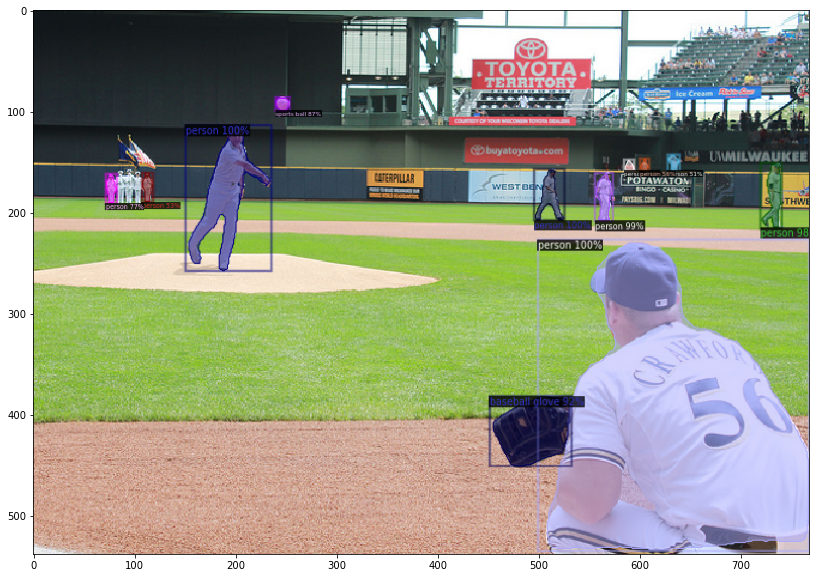

In [ ]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(out.get_image()[..., ::-1][..., ::-1])